In [92]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
model = tf.keras.models.load_model('flowers_266_97.h5')

In [94]:
TEST_DIR = 'Test - Revisian/'

In [95]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 70 images belonging to 7 classes.


In [96]:
evaluation_results = model.evaluate(test_generator)

print("Test Loss : ", evaluation_results[0])
print("Test Accuracy : ", evaluation_results[1])

3/3 [==============================] - 2s 342ms/step - loss: 0.5275 - accuracy: 0.8571
Test Loss :  0.5275009870529175
Test Accuracy :  0.8571428656578064


In [97]:
predictions = model.predict(test_generator)
classes = os.listdir(TEST_DIR)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

# Assuming classes contains the correct class names present in your dataset
classes = ["Anyelir", "Aster Cina", "Gerbera", "Lily Peruvian", "Lisianthus", "Matahari", "Mulut Naga"]

conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix MobileNetV2:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

3/3 [==============================] - 2s 246ms/step
Confusion Matrix MobileNetV2:
[[ 9  0  0  0  0  0  1]
 [ 0  9  0  0  0  0  1]
 [ 1  1  8  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  0  3  0  0  7  0]
 [ 0  0  0  0  2  0  8]]

Classification Report:
               precision    recall  f1-score   support

      Anyelir       0.82      0.90      0.86        10
   Aster Cina       0.90      0.90      0.90        10
      Gerbera       0.73      0.80      0.76        10
Lily Peruvian       1.00      0.90      0.95        10
   Lisianthus       0.83      1.00      0.91        10
     Matahari       1.00      0.70      0.82        10
   Mulut Naga       0.80      0.80      0.80        10

     accuracy                           0.86        70
    macro avg       0.87      0.86      0.86        70
 weighted avg       0.87      0.86      0.86        70



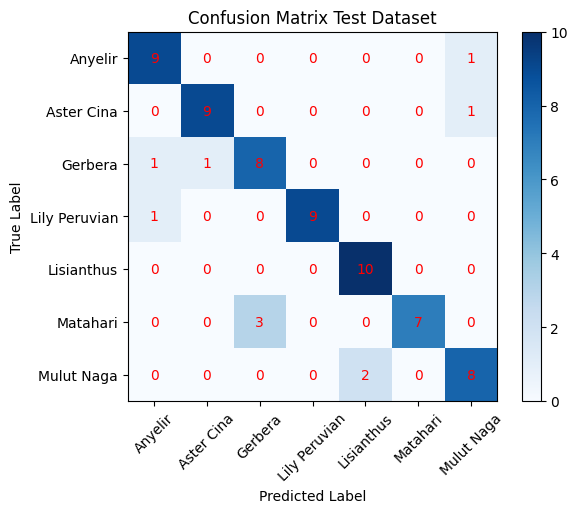

In [98]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix Test Dataset', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')  # Display the numerical value in each cell

    plt.show()

# Display confusion matrix with numerical values
plot_confusion_matrix(conf_matrix, classes)